In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [10]:
datasets=[
['./csvs/A211102.csv',   './csvs/A211105.csv',   './csvs/I211102.csv',   './csvs/I211103.csv',   './csvs/I211104.csv'],  
['./csvs/A211108.csv',   './csvs/A211109.csv',   './csvs/A211115.csv',   './csvs/A211116.csv',   './csvs/A211117.csv',   './csvs/A211118.csv',   './csvs/A211122.csv',   './csvs/A211123.csv',   './csvs/A211125.csv',   './csvs/A211206.csv',   './csvs/A211208.csv',   './csvs/A211223.csv',   './csvs/A211225.csv',   './csvs/A211228.csv',   './csvs/I211108.csv',   './csvs/I211112.csv',   './csvs/I211115.csv',   './csvs/I211118.csv',   './csvs/I211119.csv',   './csvs/I211122.csv'],  
['./csvs/A211110.csv', './csvs/A211112.csv', './csvs/I211110.csv'],  
['./csvs/A211124.csv',   './csvs/I211124.csv',   './csvs/I211125.csv',   './csvs/I211201.csv',   './csvs/I211202.csv',   './csvs/I211203.csv',   './csvs/I211207.csv',   './csvs/I211208.csv',   './csvs/I211209.csv',   './csvs/I211210.csv',   './csvs/I211213.csv',   './csvs/I211215.csv',   './csvs/I211216.csv',   './csvs/I211220.csv',   './csvs/I211222.csv',   './csvs/I211223.csv'],  
['./csvs/A211126.csv', './csvs/A211207.csv'],  
['./csvs/I211116.csv', './csvs/I211117.csv']] 


In [4]:
path="./results/vs"
output="./results/pdf/"

In [5]:
filenames=find_the_way(path,"CB.csv")
filenames

['./results/vs\\@A211102@A211102CB.csv',
 './results/vs\\@A211102@A211105CB.csv',
 './results/vs\\@A211102@I211102CB.csv',
 './results/vs\\@A211102@I211103CB.csv',
 './results/vs\\@A211102@I211104CB.csv',
 './results/vs\\@A211105@A211102CB.csv',
 './results/vs\\@A211105@A211105CB.csv',
 './results/vs\\@A211105@I211102CB.csv',
 './results/vs\\@A211105@I211103CB.csv',
 './results/vs\\@A211105@I211104CB.csv',
 './results/vs\\@A211108@A211108CB.csv',
 './results/vs\\@A211108@A211109CB.csv',
 './results/vs\\@A211108@A211115CB.csv',
 './results/vs\\@A211108@A211116CB.csv',
 './results/vs\\@A211108@A211117CB.csv',
 './results/vs\\@A211108@A211118CB.csv',
 './results/vs\\@A211108@A211122CB.csv',
 './results/vs\\@A211108@A211123CB.csv',
 './results/vs\\@A211108@A211125CB.csv',
 './results/vs\\@A211108@A211206CB.csv',
 './results/vs\\@A211108@A211208CB.csv',
 './results/vs\\@A211108@A211223CB.csv',
 './results/vs\\@A211108@A211225CB.csv',
 './results/vs\\@A211108@A211228CB.csv',
 './results/vs\\

In [6]:
fulname={"A-A":"Active vs Active",
"A-I":"Active vs Idle",
"I-A":"Idle vs Active",
"I-I":"Idle vs Idle"}

In [7]:
hist = {} 
for i in filenames:
    x=f"{i[22]}-{i[14]}"
    hist[fulname[x]] = hist.get(fulname[x], 0) + 1


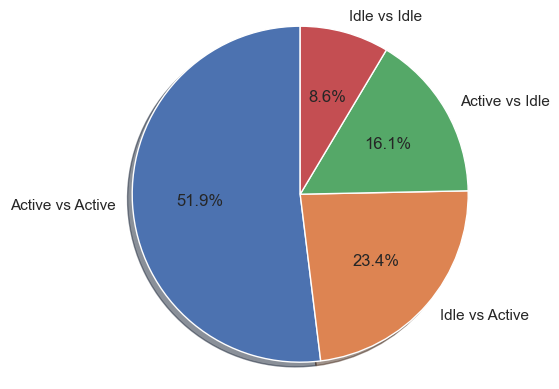

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]

sizes = hist.values()
labels =  hist.keys()

explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("pie.distirbution2.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [13]:
failed_devices=[]
failed_dict={}
for i in filenames:
    df=pd.read_csv(i)
    df=df[:-3]
    df=df[df["f1-score"]<0.50]
    temp=list(df['Unnamed: 0'].values)
    if len(temp)>0:
        durum=f"{i[22]}-{i[14]}"
        failed_devices.append(temp)
        if durum not in failed_dict:
            failed_dict[durum]=[temp]
        else:
            failed_dict[durum].append(temp)
            
            
            


In [14]:
unique_devices=sum(failed_devices, [])
unique_devices=list(set(unique_devices))
unique_devices

['iRobot Roomba',
 'Nest Indoor Camera',
 'HeimVision Smart WiFi Camera',
 'Yutron Plug 1',
 'Gosund ESP_1ACEE1  Socket',
 'Gosund ESP_039AAF Socket',
 'Teckin Plug 2',
 'Netatmo Weather Station',
 'Philips Hue Bridge',
 'Amazon Alexa Echo Spot',
 'Gosund ESP_032979 Plug',
 'Gosund ESP_10ACD8 Plug',
 'Amazon Plug',
 'Sonos One Speaker',
 'Gosund ESP_0C3994 Plug',
 'LG Smart TV',
 'Amazon Alexa Echo Studio',
 'Atomi Coffee Maker',
 'Gosund ESP_10098F Socket',
 'Arlo Q Camera',
 'Arlo Base Station',
 'Netatmo Camera',
 'Amazon Alexa Echo Dot 2',
 'Amazon Alexa Echo Dot 1',
 'Google Nest Mini',
 'Eufy HomeBase 2',
 'DCS8000LHA1 D-Link Mini Camera',
 'HeimVision SmartLife Radio/Lamp',
 'Globe Lamp ESP_B1680C',
 'Gosund ESP_147FF9 Plug',
 'Yutron Plug 2',
 'Smart Board',
 'Ring Base Station AC:1236',
 'Luohe Cam Dog',
 'Teckin Plug 1']

In [15]:
failed_dict

{'A-A': [['Amazon Alexa Echo Dot 1',
   'Amazon Alexa Echo Dot 2',
   'Ring Base Station AC:1236'],
  ['Amazon Alexa Echo Dot 1',
   'Amazon Alexa Echo Dot 2',
   'Arlo Base Station',
   'Ring Base Station AC:1236'],
  ['Gosund ESP_10098F Socket'],
  ['Amazon Alexa Echo Dot 1',
   'Amazon Alexa Echo Dot 2',
   'Gosund ESP_10098F Socket'],
  ['Amazon Alexa Echo Dot 1',
   'Amazon Alexa Echo Dot 2',
   'Amazon Alexa Echo Spot',
   'Atomi Coffee Maker',
   'Globe Lamp ESP_B1680C',
   'Gosund ESP_039AAF Socket',
   'Gosund ESP_0C3994 Plug',
   'Gosund ESP_10098F Socket',
   'Gosund ESP_10ACD8 Plug',
   'Gosund ESP_147FF9 Plug',
   'Gosund ESP_1ACEE1  Socket',
   'HeimVision SmartLife Radio/Lamp',
   'Nest Indoor Camera',
   'Ring Base Station AC:1236',
   'Smart Board',
   'Teckin Plug 1',
   'Teckin Plug 2',
   'Yutron Plug 1',
   'Yutron Plug 2'],
  ['Amazon Alexa Echo Dot 1',
   'Amazon Alexa Echo Dot 2',
   'Amazon Alexa Echo Spot',
   'Atomi Coffee Maker',
   'Globe Lamp ESP_B1680C',


In [16]:
flatted={}
for i in failed_dict:
    print(i,len(failed_dict[i]))
    f = failed_dict[i]
    flatted[i]=sum(f, [])

A-A 191
I-A 107
A-I 107
I-I 250


In [17]:
flatted

{'A-A': ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Ring Base Station AC:1236',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Arlo Base Station',
  'Ring Base Station AC:1236',
  'Gosund ESP_10098F Socket',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Gosund ESP_10098F Socket',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund ESP_039AAF Socket',
  'Gosund ESP_0C3994 Plug',
  'Gosund ESP_10098F Socket',
  'Gosund ESP_10ACD8 Plug',
  'Gosund ESP_147FF9 Plug',
  'Gosund ESP_1ACEE1  Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station AC:1236',
  'Smart Board',
  'Teckin Plug 1',
  'Teckin Plug 2',
  'Yutron Plug 1',
  'Yutron Plug 2',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund ESP_039AAF Socket',
  'Gosund 

In [18]:
flatted

{'A-A': ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Ring Base Station AC:1236',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Arlo Base Station',
  'Ring Base Station AC:1236',
  'Gosund ESP_10098F Socket',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Gosund ESP_10098F Socket',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund ESP_039AAF Socket',
  'Gosund ESP_0C3994 Plug',
  'Gosund ESP_10098F Socket',
  'Gosund ESP_10ACD8 Plug',
  'Gosund ESP_147FF9 Plug',
  'Gosund ESP_1ACEE1  Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station AC:1236',
  'Smart Board',
  'Teckin Plug 1',
  'Teckin Plug 2',
  'Yutron Plug 1',
  'Yutron Plug 2',
  'Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund ESP_039AAF Socket',
  'Gosund 

In [19]:
sonuc={}
for j in flatted:
    hist = {} 
    for x in flatted[j] : 
        hist[x] = hist.get(x, 0) + 1
    for u in unique_devices:
        if u not in hist:
            hist[u]=0
    hist=dict(sorted(hist.items()))
    sonuc[j]=hist
    
    

In [20]:
sonuc

{'A-A': {'Amazon Alexa Echo Dot 1': 68,
  'Amazon Alexa Echo Dot 2': 172,
  'Amazon Alexa Echo Spot': 42,
  'Amazon Alexa Echo Studio': 16,
  'Amazon Plug': 0,
  'Arlo Base Station': 20,
  'Arlo Q Camera': 5,
  'Atomi Coffee Maker': 112,
  'DCS8000LHA1 D-Link Mini Camera': 23,
  'Eufy HomeBase 2': 1,
  'Globe Lamp ESP_B1680C': 132,
  'Google Nest Mini': 1,
  'Gosund ESP_032979 Plug': 107,
  'Gosund ESP_039AAF Socket': 127,
  'Gosund ESP_0C3994 Plug': 135,
  'Gosund ESP_10098F Socket': 139,
  'Gosund ESP_10ACD8 Plug': 121,
  'Gosund ESP_147FF9 Plug': 129,
  'Gosund ESP_1ACEE1  Socket': 119,
  'HeimVision Smart WiFi Camera': 14,
  'HeimVision SmartLife Radio/Lamp': 102,
  'LG Smart TV': 1,
  'Luohe Cam Dog': 2,
  'Nest Indoor Camera': 90,
  'Netatmo Camera': 3,
  'Netatmo Weather Station': 25,
  'Philips Hue Bridge': 5,
  'Ring Base Station AC:1236': 158,
  'Smart Board': 108,
  'Sonos One Speaker': 51,
  'Teckin Plug 1': 130,
  'Teckin Plug 2': 122,
  'Yutron Plug 1': 131,
  'Yutron Plu

In [21]:
df=pd.DataFrame()


df["ind"]=sonuc["A-A"].keys()

for i in sonuc:
    print(sonuc)
    df[i]=sonuc[i].values()

col_list= ['A-A', 'A-I', 'I-A',"I-I"]
# sum specific columns
df['Sum'] = df[col_list].sum(axis=1)

{'A-A': {'Amazon Alexa Echo Dot 1': 68, 'Amazon Alexa Echo Dot 2': 172, 'Amazon Alexa Echo Spot': 42, 'Amazon Alexa Echo Studio': 16, 'Amazon Plug': 0, 'Arlo Base Station': 20, 'Arlo Q Camera': 5, 'Atomi Coffee Maker': 112, 'DCS8000LHA1 D-Link Mini Camera': 23, 'Eufy HomeBase 2': 1, 'Globe Lamp ESP_B1680C': 132, 'Google Nest Mini': 1, 'Gosund ESP_032979 Plug': 107, 'Gosund ESP_039AAF Socket': 127, 'Gosund ESP_0C3994 Plug': 135, 'Gosund ESP_10098F Socket': 139, 'Gosund ESP_10ACD8 Plug': 121, 'Gosund ESP_147FF9 Plug': 129, 'Gosund ESP_1ACEE1  Socket': 119, 'HeimVision Smart WiFi Camera': 14, 'HeimVision SmartLife Radio/Lamp': 102, 'LG Smart TV': 1, 'Luohe Cam Dog': 2, 'Nest Indoor Camera': 90, 'Netatmo Camera': 3, 'Netatmo Weather Station': 25, 'Philips Hue Bridge': 5, 'Ring Base Station AC:1236': 158, 'Smart Board': 108, 'Sonos One Speaker': 51, 'Teckin Plug 1': 130, 'Teckin Plug 2': 122, 'Yutron Plug 1': 131, 'Yutron Plug 2': 130, 'iRobot Roomba': 35}, 'I-A': {'Amazon Alexa Echo Dot 1'

In [22]:
df

,ind,A-A,I-A,A-I,I-I,Sum
0,Amazon Alexa Echo Dot 1,68,25,48,25,166
1,Amazon Alexa Echo Dot 2,172,95,96,241,604
2,Amazon Alexa Echo Spot,42,10,19,10,81
3,Amazon Alexa Echo Studio,16,3,6,2,27
4,Amazon Plug,0,0,1,9,10
5,Arlo Base Station,20,10,47,7,84
6,Arlo Q Camera,5,58,76,130,269
7,Atomi Coffee Maker,112,43,51,166,372
8,DCS8000LHA1 D-Link Mini Camera,23,25,1,13,62
9,Eufy HomeBase 2,1,0,3,0,4


In [23]:
df=df[df["Sum"]>12]

In [24]:
data=df.set_index('ind')

In [25]:
del data["Sum"]
data

,A-A,I-A,A-I,I-I
ind,,,,
Amazon Alexa Echo Dot 1,68,25,48,25
Amazon Alexa Echo Dot 2,172,95,96,241
Amazon Alexa Echo Spot,42,10,19,10
Amazon Alexa Echo Studio,16,3,6,2
Arlo Base Station,20,10,47,7
Arlo Q Camera,5,58,76,130
Atomi Coffee Maker,112,43,51,166
DCS8000LHA1 D-Link Mini Camera,23,25,1,13
Globe Lamp ESP_B1680C,132,58,58,158


In [26]:
data.columns = pd.Series(data.columns.to_list()).replace(fulname).to_list()
data

,Active vs Active,Idle vs Active,Active vs Idle,Idle vs Idle
ind,,,,
Amazon Alexa Echo Dot 1,68,25,48,25
Amazon Alexa Echo Dot 2,172,95,96,241
Amazon Alexa Echo Spot,42,10,19,10
Amazon Alexa Echo Studio,16,3,6,2
Arlo Base Station,20,10,47,7
Arlo Q Camera,5,58,76,130
Atomi Coffee Maker,112,43,51,166
DCS8000LHA1 D-Link Mini Camera,23,25,1,13
Globe Lamp ESP_B1680C,132,58,58,158


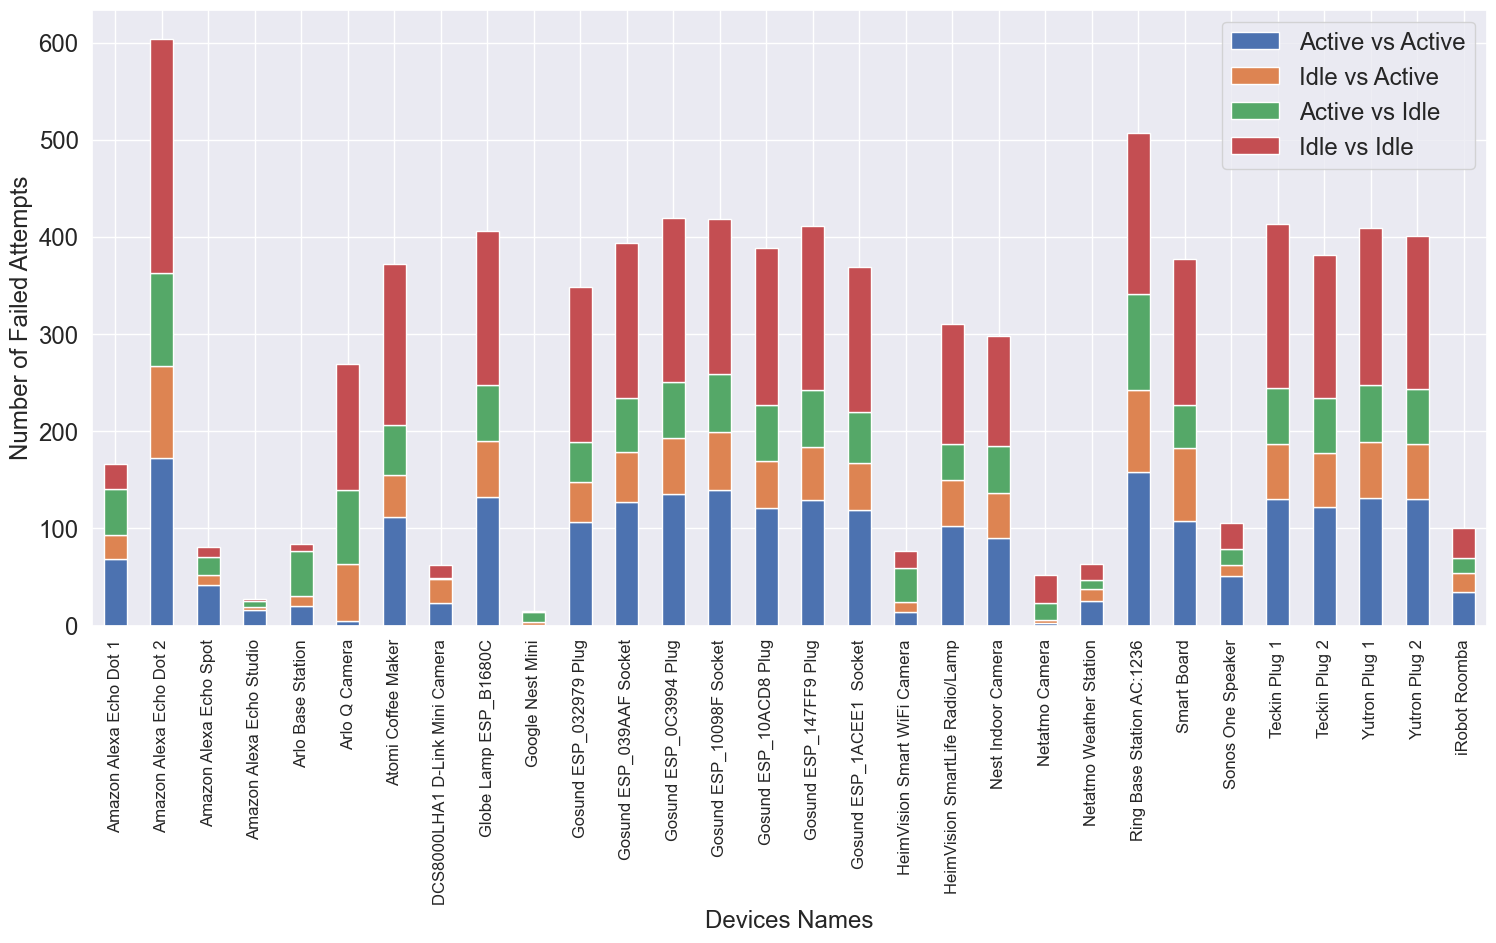

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import matplotlib.pylab as pylab

#pylab.rcParams.update(params)

data.plot.bar(stacked=True,figsize=(18,8))
graph_name=f"{output}renklifailed.pdf"
plt.ylabel("Number of Failed Attempts")
plt.xlabel("Devices Names")
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)

In [32]:
failed_devices

[['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Ring Base Station AC:1236'],
 ['Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Amazon Alexa Echo Studio'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Nest Indoor Camera',
  'Ring Base Station AC:1236'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Ring Base Station AC:1236',
  'Smart Board'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Arlo Base Station',
  'Ring Base Station AC:1236'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spot',
  'Amazon Alexa Echo Studio',
  'Arlo Q Camera',
  'Ring Base Station AC:1236'],
 ['Amazon Alexa Echo Dot 1', 'Amazon Alexa Echo Dot 2', 'Arlo Q Camera'],
 ['Amazon Alexa Echo Dot 2', 'Smart Board'],
 ['Gosund ESP_10098F Socket'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Gosund ESP_10098F Socket'],
 ['Amazon Alexa Echo Dot 1',
  'Amazon Alexa Echo Dot 2',
  'Amazon Alexa Echo Spo

In [27]:
hist = {} 
for i in failed_devices:
    for x in i : 
        hist[x] = hist.get(x, 0) + 1
hist=dict(sorted(hist.items()))

In [28]:
D = {}
for i in hist:
    if hist[i]>12: #We accept a margin of error of 2% as normal. therefore we list devices that have been seen more than 12 times.
        D[i]=hist[i]
        

In [29]:
D

{'Amazon Alexa Echo Dot 1': 166,
 'Amazon Alexa Echo Dot 2': 604,
 'Amazon Alexa Echo Spot': 81,
 'Amazon Alexa Echo Studio': 27,
 'Arlo Base Station': 84,
 'Arlo Q Camera': 269,
 'Atomi Coffee Maker': 372,
 'DCS8000LHA1 D-Link Mini Camera': 62,
 'Globe Lamp ESP_B1680C': 406,
 'Google Nest Mini': 15,
 'Gosund ESP_032979 Plug': 348,
 'Gosund ESP_039AAF Socket': 394,
 'Gosund ESP_0C3994 Plug': 420,
 'Gosund ESP_10098F Socket': 419,
 'Gosund ESP_10ACD8 Plug': 389,
 'Gosund ESP_147FF9 Plug': 411,
 'Gosund ESP_1ACEE1  Socket': 369,
 'HeimVision Smart WiFi Camera': 77,
 'HeimVision SmartLife Radio/Lamp': 310,
 'Nest Indoor Camera': 298,
 'Netatmo Camera': 52,
 'Netatmo Weather Station': 63,
 'Ring Base Station AC:1236': 507,
 'Smart Board': 377,
 'Sonos One Speaker': 106,
 'Teckin Plug 1': 413,
 'Teckin Plug 2': 381,
 'Yutron Plug 1': 409,
 'Yutron Plug 2': 401,
 'iRobot Roomba': 100}

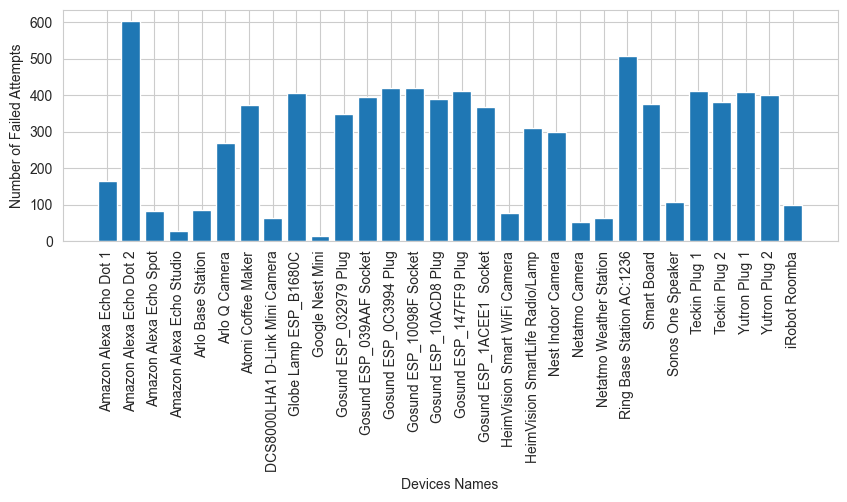

In [30]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10,3))


plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xticks(rotation=90) 
graph_name=f"{output}failed.pdf"
plt.ylabel("Number of Failed Attempts")
plt.xlabel("Devices Names")
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [31]:
D

{'Amazon Alexa Echo Dot 1': 166,
 'Amazon Alexa Echo Dot 2': 604,
 'Amazon Alexa Echo Spot': 81,
 'Amazon Alexa Echo Studio': 27,
 'Arlo Base Station': 84,
 'Arlo Q Camera': 269,
 'Atomi Coffee Maker': 372,
 'DCS8000LHA1 D-Link Mini Camera': 62,
 'Globe Lamp ESP_B1680C': 406,
 'Google Nest Mini': 15,
 'Gosund ESP_032979 Plug': 348,
 'Gosund ESP_039AAF Socket': 394,
 'Gosund ESP_0C3994 Plug': 420,
 'Gosund ESP_10098F Socket': 419,
 'Gosund ESP_10ACD8 Plug': 389,
 'Gosund ESP_147FF9 Plug': 411,
 'Gosund ESP_1ACEE1  Socket': 369,
 'HeimVision Smart WiFi Camera': 77,
 'HeimVision SmartLife Radio/Lamp': 310,
 'Nest Indoor Camera': 298,
 'Netatmo Camera': 52,
 'Netatmo Weather Station': 63,
 'Ring Base Station AC:1236': 507,
 'Smart Board': 377,
 'Sonos One Speaker': 106,
 'Teckin Plug 1': 413,
 'Teckin Plug 2': 381,
 'Yutron Plug 1': 409,
 'Yutron Plug 2': 401,
 'iRobot Roomba': 100}

In [32]:
hist

{'Amazon Alexa Echo Dot 1': 166,
 'Amazon Alexa Echo Dot 2': 604,
 'Amazon Alexa Echo Spot': 81,
 'Amazon Alexa Echo Studio': 27,
 'Amazon Plug': 10,
 'Arlo Base Station': 84,
 'Arlo Q Camera': 269,
 'Atomi Coffee Maker': 372,
 'DCS8000LHA1 D-Link Mini Camera': 62,
 'Eufy HomeBase 2': 4,
 'Globe Lamp ESP_B1680C': 406,
 'Google Nest Mini': 15,
 'Gosund ESP_032979 Plug': 348,
 'Gosund ESP_039AAF Socket': 394,
 'Gosund ESP_0C3994 Plug': 420,
 'Gosund ESP_10098F Socket': 419,
 'Gosund ESP_10ACD8 Plug': 389,
 'Gosund ESP_147FF9 Plug': 411,
 'Gosund ESP_1ACEE1  Socket': 369,
 'HeimVision Smart WiFi Camera': 77,
 'HeimVision SmartLife Radio/Lamp': 310,
 'LG Smart TV': 1,
 'Luohe Cam Dog': 2,
 'Nest Indoor Camera': 298,
 'Netatmo Camera': 52,
 'Netatmo Weather Station': 63,
 'Philips Hue Bridge': 9,
 'Ring Base Station AC:1236': 507,
 'Smart Board': 377,
 'Sonos One Speaker': 106,
 'Teckin Plug 1': 413,
 'Teckin Plug 2': 381,
 'Yutron Plug 1': 409,
 'Yutron Plug 2': 401,
 'iRobot Roomba': 100}

In [33]:
df=pd.read_csv('./results/vs\\@A211108@A211115CB.csv')

In [34]:
df

,Unnamed: 0,precision,recall,f1-score,support
0,AMCREST WiFi Camera,0.987324,0.977377,0.982325,5658.000000
1,Amazon Alexa Echo Dot 1,0.477972,0.396722,0.433573,12142.000000
2,Amazon Alexa Echo Dot 2,0.377157,0.537753,0.443360,11827.000000
3,Amazon Alexa Echo Spot,0.146826,0.804179,0.248315,14932.000000
4,Amazon Alexa Echo Studio,0.857972,0.780562,0.817438,14209.000000
5,Amazon Plug,0.991597,0.905702,0.946705,1824.000000
6,Arlo Base Station,0.994976,0.991468,0.993219,110057.000000
7,Arlo Q Camera,0.917115,0.941595,0.929194,55184.000000
8,Atomi Coffee Maker,0.156627,0.030952,0.051690,7140.000000
9,Borun/Sichuan-AI Camera,0.934652,0.965999,0.950067,17264.000000
